In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 1. Load the dataset
df = pd.read_csv('data_3.csv')

# 2. Check for missing values
print(df.isnull().sum())

# 3. Fill missing values with mode
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# 4. Encoding categorical variables (Spatial Distribution and Temporal Distribution)
le = LabelEncoder()
df['Spatial Distribution'] = le.fit_transform(df['Spatial Distribution'])
df['Temporal Distribution'] = le.fit_transform(df['Temporal Distribution'])

# 5. Print out the preprocessed dataframe and save
print(df.head())
df.to_csv('preprocessed_data_3.csv', index=False)

Node Number               0
Thread Number             0
Spatial Distribution      0
Temporal Distribution     0
T/R                       0
Processor Utilization     0
Channel Waiting Time      0
Input Waiting Time        0
Network Response Time     0
Channel Utilization       0
dtype: int64
   Node Number  Thread Number  Spatial Distribution  Temporal Distribution  \
0           64              4                     3                      1   
1           64              4                     3                      1   
2           64              4                     3                      1   
3           64              4                     3                      1   
4           64              4                     3                      1   

   T/R  Processor Utilization   Channel Waiting Time  Input Waiting Time  \
0  0.1                0.839546              1.974686          308.491814   
1  0.2                0.827412              9.556437          291.037663   
2  0.3    

节点数量（Node Number）：网络中节点的数量。可以是8x8或4x4。
线程数量（Thread Number）：仿真开始时每个节点中的线程数量。
空间分布（Spatial Distribution）：使用合成的流量工作负载评估网络的性能。包括均匀（UN）、热区（HR）、位反转（BR）和完美洗牌（PS）流量模型。
时间分布（Temporal Distribution）：数据包生成的时间分布由独立的流量源实现。在仿真中，使用了客户端-服务器流量（即，服务器节点发送数据包以响应来自客户端的数据包）和异步流量（即，最初，所有节点独立地生成流量，而不受其他节点的影响；随着时间的推移，源/目的节点的流量生成取决于来自目的/源节点的消息的接收）。
T/R：消息传输时间（T）在20到100个时钟周期的范围内均匀分布。线程运行时间（R）指数分布，平均为100个时钟周期。
处理器利用率（Processor Utilization）：平均处理器利用率衡量线程在处理器中运行的时间百分比。
通道等待时间（Channel Waiting Time）：数据包在输出通道队列中等待服务直到被通道服务的平均时间。
输入等待时间（Input Waiting Time）：数据包等待被处理器服务的平均时间。
网络响应时间（Network Response Time）：请求消息在输出通道入队和相应的数据消息在输入队列接收之间的时间。
通道利用率（Channel Utilization）：通道传输数据包并忙碌的时间百分比。

我们首先加载了数据集 'data_3.csv'，然后进行了数据预处理。在数据预处理的过程中，我们首先检查了数据集中的缺失值。接着，使用每一列的众数填充了相应的缺失值。然后，我们对分类变量 'Spatial Distribution' 和 'Temporal Distribution' 进行了标签编码。最后，我们打印并保存了预处理后的数据集。

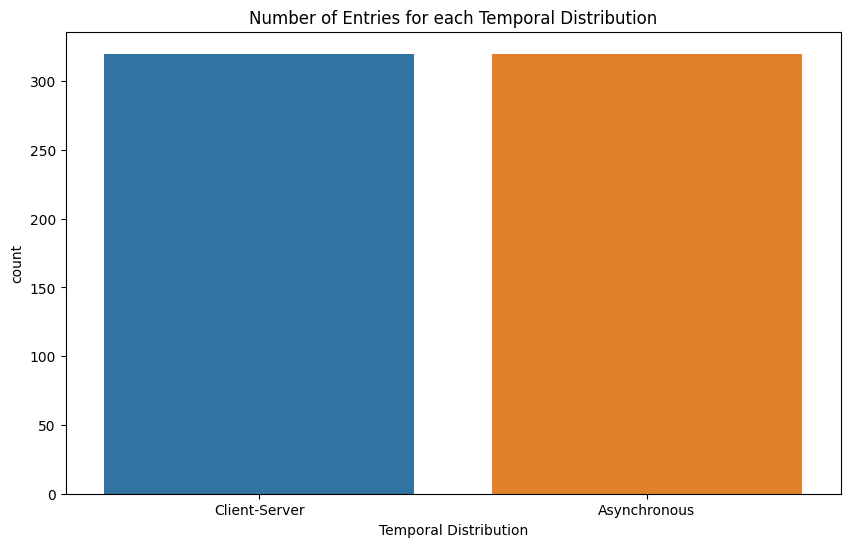

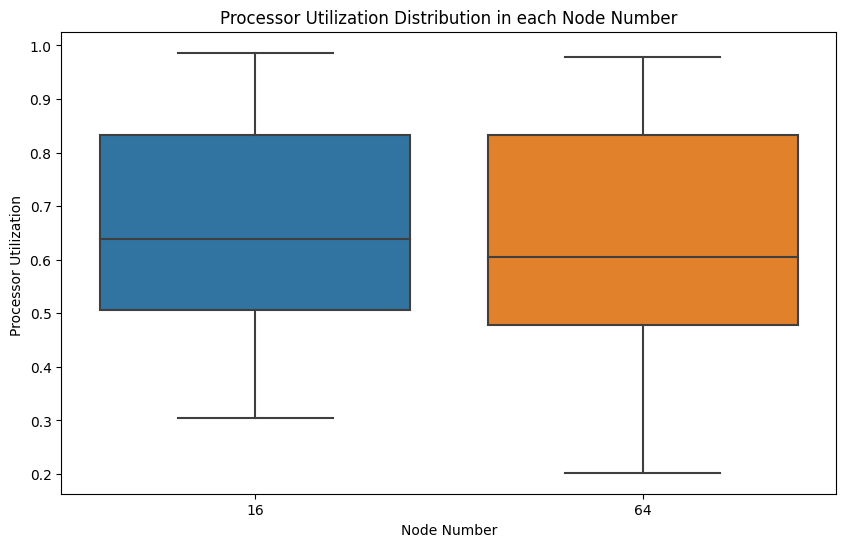

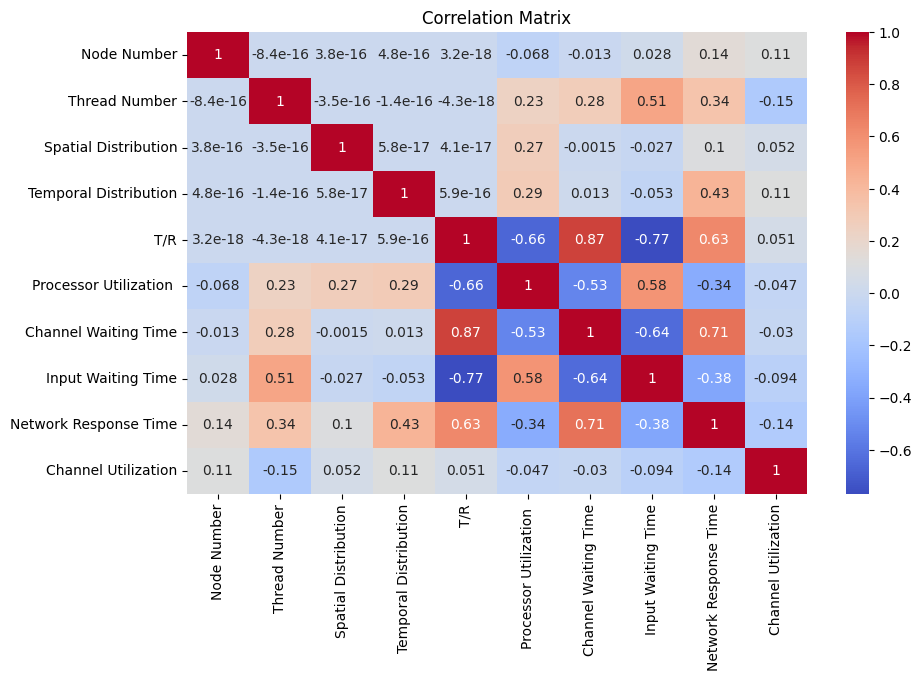

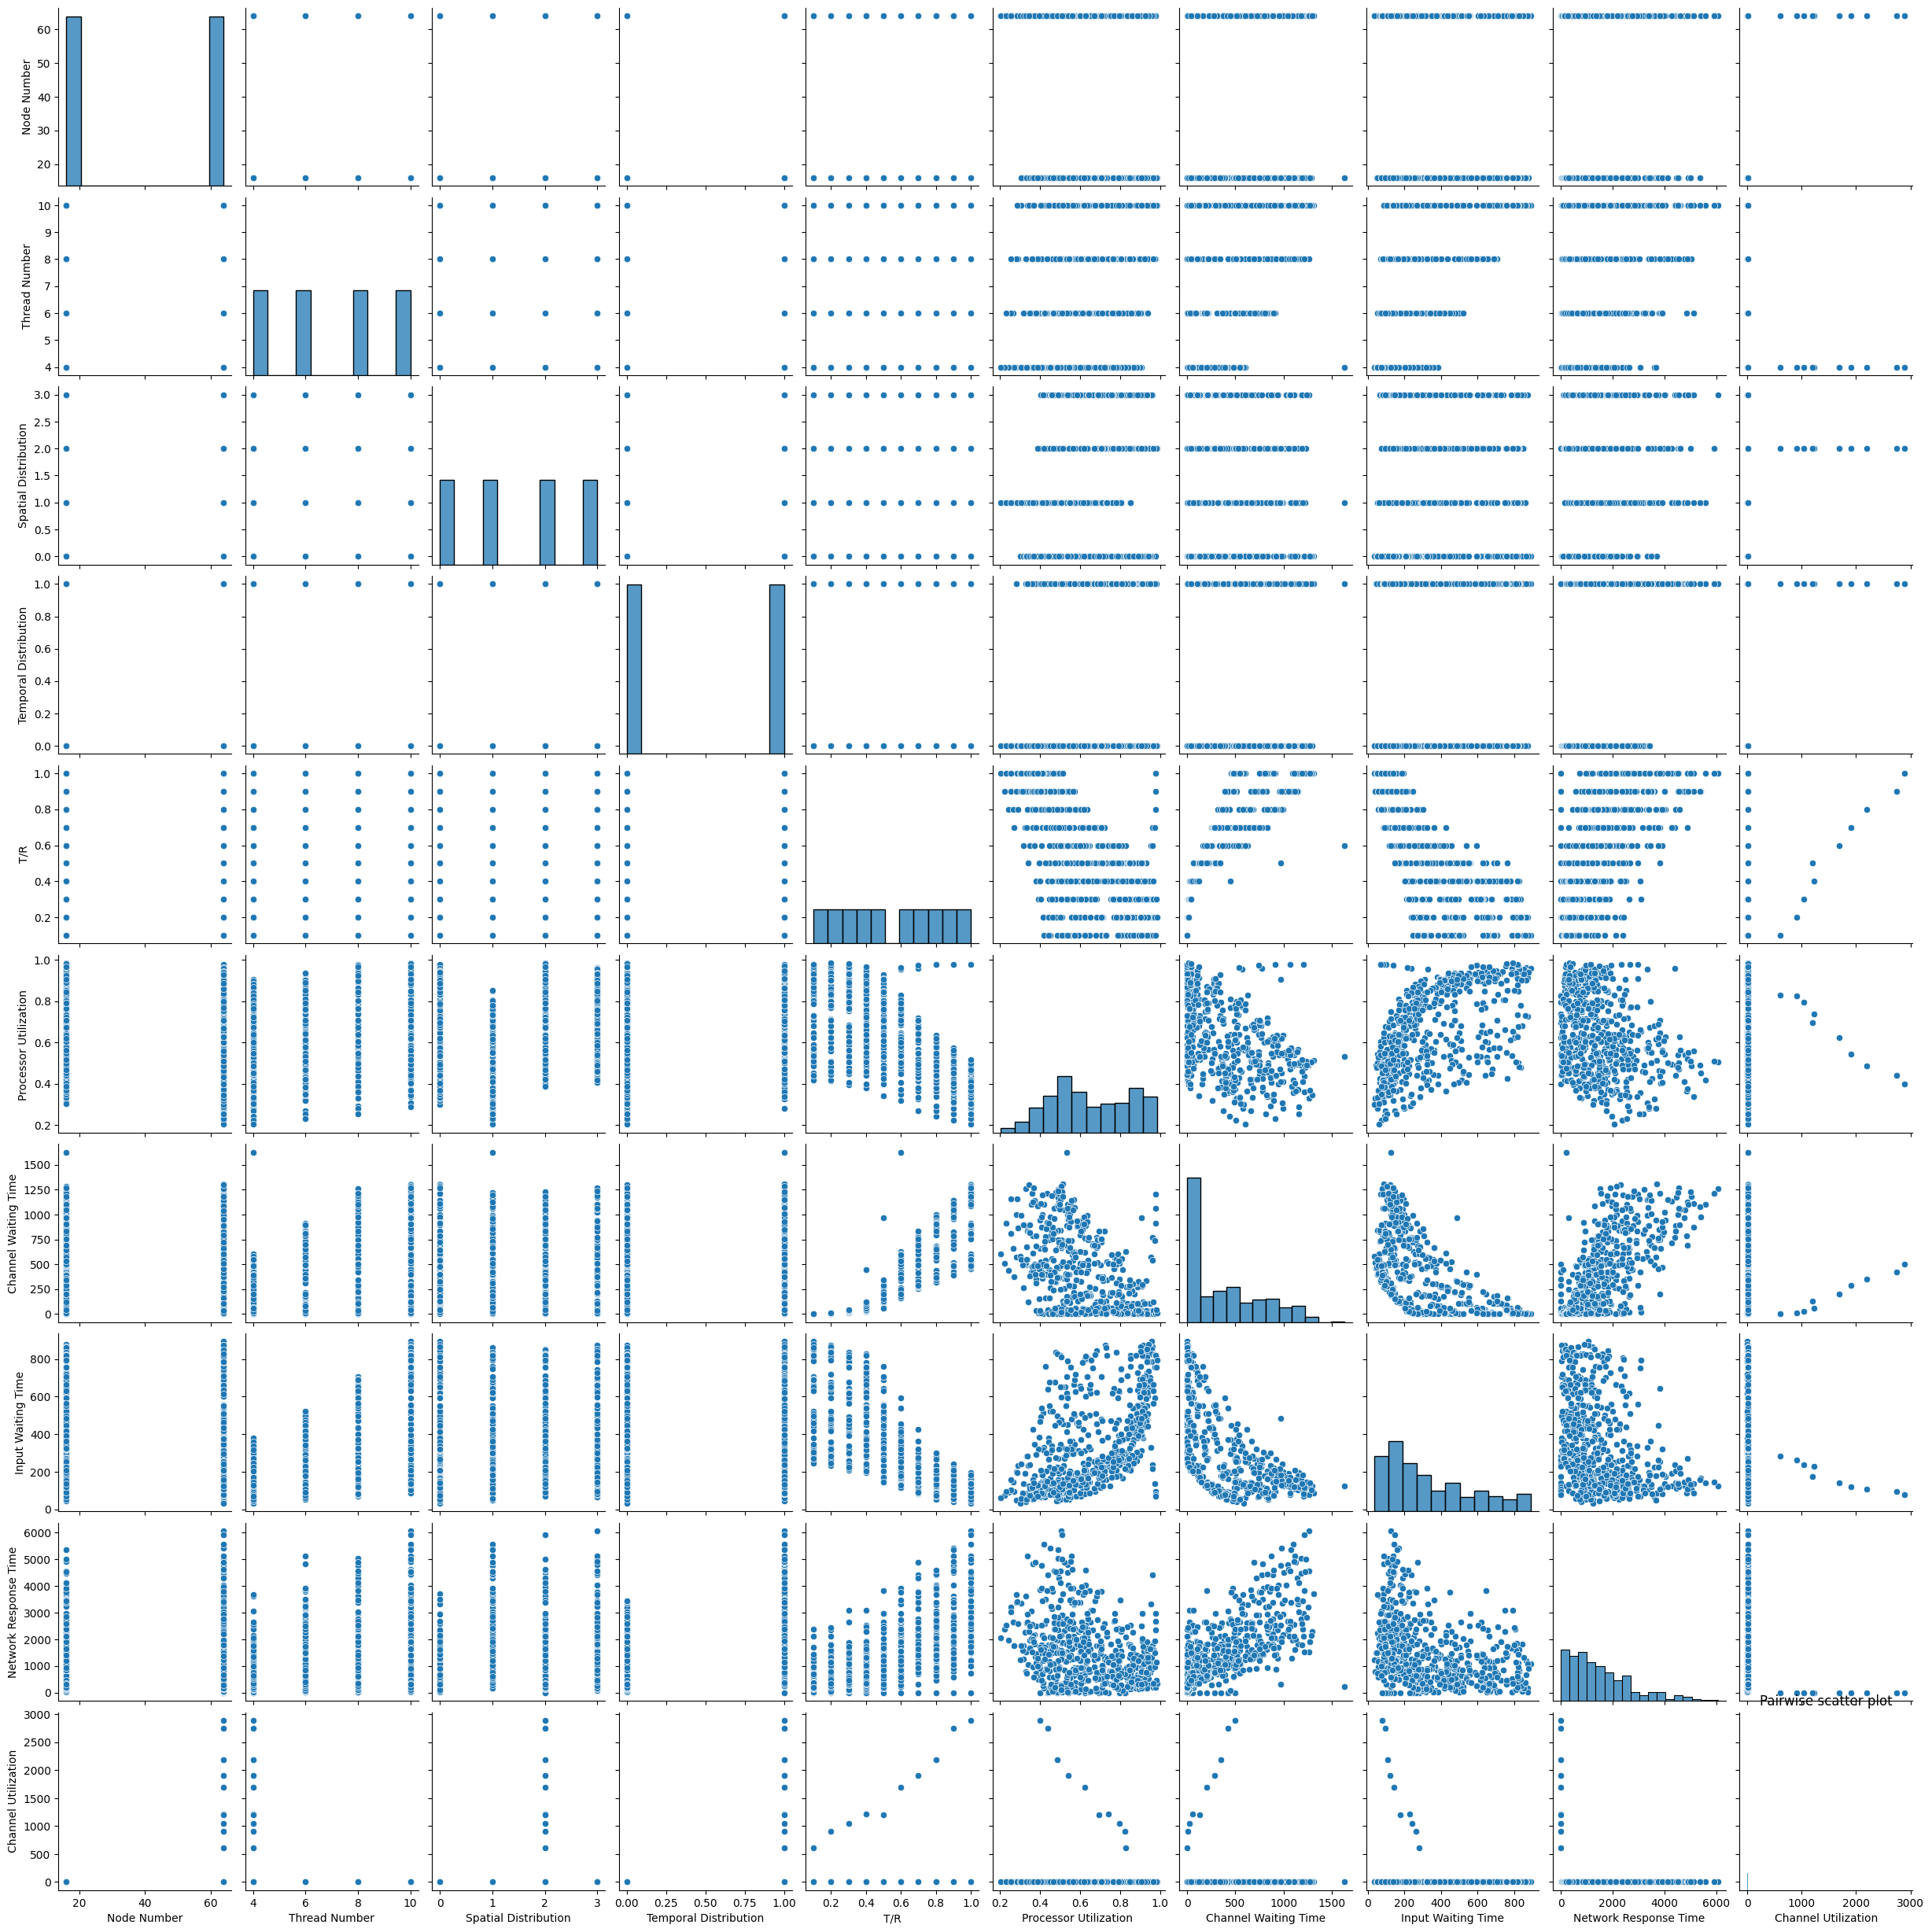

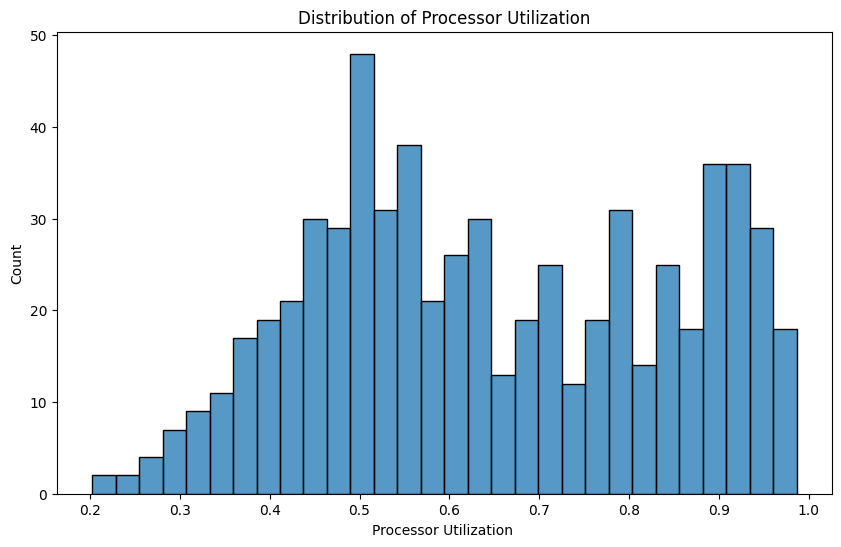

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data_3.csv') 

# 1. Bar Plot
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Temporal Distribution')
plt.title('Number of Entries for each Temporal Distribution')
plt.show()

# 2. Box Plot (For Processor Utilization in each Node Number)
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Node Number', y='Processor Utilization ')
plt.title('Processor Utilization Distribution in each Node Number')
plt.show()

df = pd.read_csv('preprocessed_data_3.csv') 
# 3.Heatmap
# Create a copy of the dataframe only with numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 4. Scatter Plot
# Pairwise scatter plot
sns.pairplot(df_numeric)
plt.title('Pairwise scatter plot')
plt.show()

# 5. Histogram
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Processor Utilization ', bins=30)
plt.title('Distribution of Processor Utilization')
plt.show()

在数据分析部分，我们主要通过绘制各种图表来对数据集进行了探索性分析。首先，我们绘制了一个条形图，以显示每个时间分布的条目数量。然后，我们绘制了一个箱型图，展示了每个节点号中的处理器利用率。接着，我们创建了一个相关性矩阵的热力图，只包括数值型列。这帮助我们理解数据集中各个特征之间的关系。然后，我们绘制了散点图，展示了所有数值型列之间的两两关系。最后，我们绘制了处理器利用率的直方图，这可以帮助我们了解处理器利用率的分布。

条形图（Bar Plot）：它可以帮助我们理解每个时间分布中的条目数量。
箱型图（Box Plot）：它可以帮助我们理解每个节点数量中处理器利用率的分布。
热力图（Heatmap）：用于显示特征之间的相关性。
散点图（Scatter Plot）：可以查看两个特征之间的关系，例如处理器利用率和节点数量。
直方图（Histogram）：可以帮助我们理解处理器利用率的分布情况。

如何理解箱型图（Box Plot）：
箱型图（Box Plot）是一种用于展示数据分布情况的图形，包括中位数、四分位数、极值等统计量。以下是一个箱型图的主要组成部分：
箱子的上边缘和下边缘分别表示上四分位数（Q3，即75%分位数）和下四分位数（Q1，即25%分位数）。箱子的长度（Q3-Q1）被称为四分位距，表示数据的中间50%的分布范围。
箱子中间的线（通常是绿色或黑色）表示数据的中位数（即50%分位数）。
上下两个“须”（T形的线）表示数据的极值（最大值和最小值）。然而，这并不总是包含所有数据，异常值（离群点）通常不包括在内。
离群点通常用点或其他符号表示。它们表示的是那些超过上边缘或下边缘一定距离的值（通常是1.5倍的四分位距）。

直方图和条形图的区别：
直方图用来展示连续变量的分布，即展示在一个范围（或"桶"）中的观察次数。这些桶或范围是自动创建的。
条形图通常用于比较类别变量。每个条形代表一个类别，高度代表其频率或计数。

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the data
df = pd.read_csv('preprocessed_data_3.csv')

# Select features and target
features = ['Processor Utilization ', 'Network Response Time', 'Channel Utilization']
X = df[features]
y = df['Temporal Distribution']

# Encode labels in target
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8515625


我们首先载入预处理过的数据集 'preprocessed_data_3.csv'。接着，我们选择 'Processor Utilization '，'Network Response Time' 和 'Channel Utilization' 作为特征，以 'Temporal Distribution' 作为目标进行分类预测。

我们使用 sklearn 的 LabelEncoder 对目标变量进行编码，然后将数据划分为训练集和测试集。我们初始化一个随机森林分类器模型，拟合训练数据，然后在测试数据上进行预测。最后，我们计算了模型的准确度。

Mean Squared Error: 0.012317079233116332
Root Mean Squared Error: 0.11098233748266582
Mean Absolute Error: 0.06950190687499999
Coefficient of Determination (R^2): 0.7013399412396863


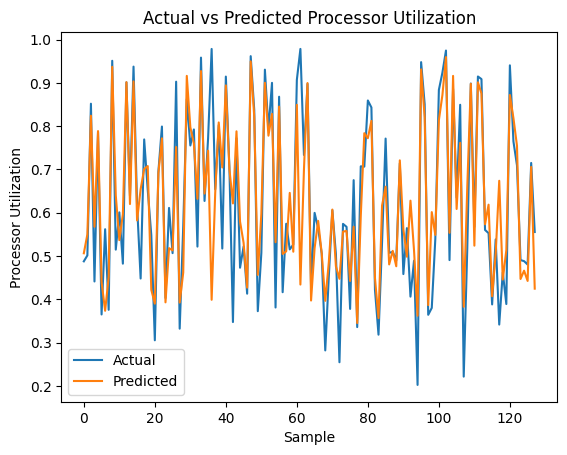

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Load the data
df = pd.read_csv('preprocessed_data_3.csv')

# Select features and target
X = df[['T/R', 'Channel Waiting Time', 'Input Waiting Time']]
y = df['Processor Utilization ']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)
print('Coefficient of Determination (R^2):', r2)

import matplotlib.pyplot as plt
import numpy as np

# Create a new figure
plt.figure()

# Plot the actual values
plt.plot(np.arange(len(y_test)), y_test, label='Actual')

# Plot the predicted values
plt.plot(np.arange(len(y_test)), y_pred, label='Predicted')

# Set the labels and title
plt.xlabel('Sample')
plt.ylabel('Processor Utilization')
plt.title('Actual vs Predicted Processor Utilization')

# Add a legend
plt.legend()

# Display the plot
plt.show()

接着，我们使用随机森林回归模型预测 'Processor Utilization '。我们选择 'T/R'，'Channel Waiting Time' 和 'Input Waiting Time' 作为特征。模型拟合训练数据后，我们在测试数据上进行预测，并计算了均方误差 (MSE)，均方根误差 (RMSE)，平均绝对误差 (MAE) 和决定系数 (R^2)。

最后，我们绘制了一个图形，将预测的处理器利用率与实际的处理器利用率进行了比较。从图形中可以直观地看出模型的预测表现。